In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data=pd.read_csv("Mik_Pro.csv")
data.head()

,Year,Milk Production
0,1980,1620
1,1981,1899
2,1982,2015
3,1983,2096
4,1984,2110


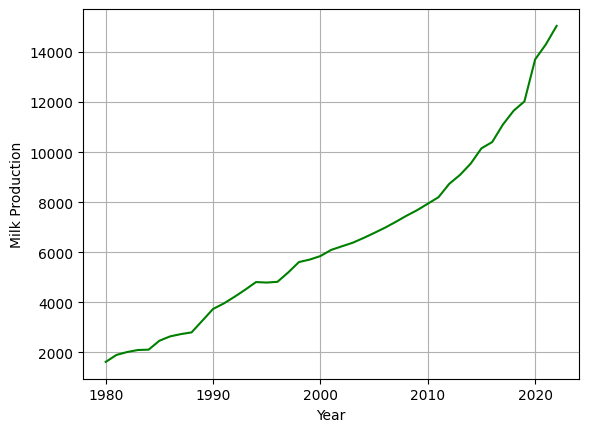

In [3]:
sns.lineplot(x="Year",y="Milk Production",data=data,color="green")
plt.grid(True)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [5]:
rfr=RandomForestRegressor()

In [6]:
x=data[["Year"]]
y=data["Milk Production"]
x=ss.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)


In [10]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2*100

99.35240054401565

In [11]:
results=pd.DataFrame({
    "Actual Values":y_test,
    "Predicted Values":y_pred,
    "Residual":y_test-y_pred
})

In [12]:
results

,Actual Values,Predicted Values,Residual
37,11102,11596.02,-494.02
24,6567,6394.72,172.28
25,6769,7007.02,-238.02
36,10402,10283.73,118.27
34,9542,9826.80,-284.80
39,12024,12517.09,-493.09
4,2110,2195.56,-85.56
12,4222,4339.72,-117.72
8,2800,2924.14,-124.14


In [13]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
dt=DecisionTreeRegressor()

In [14]:
dt.fit(x_train,y_train)
y_pred2=dt.predict(x_test)
r2=r2_score(y_test,y_pred2)
r2*100

99.04385861756573

In [15]:
results2=pd.DataFrame({
    "Actual Values":y_test,
    "Predicted Values":y_pred2,
    "Residual":y_test-y_pred2
})

In [16]:
results2

,Actual Values,Predicted Values,Residual
37,11102,11655.0,-553.0
24,6567,6379.0,188.0
25,6769,6978.0,-209.0
36,10402,10152.0,250.0
34,9542,10152.0,-610.0
39,12024,11655.0,369.0
4,2110,2096.0,14.0
12,4222,4506.0,-284.0
8,2800,2731.0,69.0


In [17]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [18]:
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)
r2=r2_score(y_test,y_pred3)
r2*100

98.62743208789865

In [19]:
results3=pd.DataFrame({
    "Actual Values":y_test,
    "Predicted Values":y_pred3,
    "Residual":y_test-y_pred3
})
results3

,Actual Values,Predicted Values,Residual
37,11102,11780.6,-678.6
24,6567,6579.8,-12.8
25,6769,6852.0,-83.0
36,10402,10666.4,-264.4
34,9542,9565.8,-23.8
39,12024,12971.0,-947.0
4,2110,2223.2,-113.2
12,4222,4359.4,-137.4
8,2800,2967.8,-167.8


In [20]:
pip install matplotlib graphviz



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


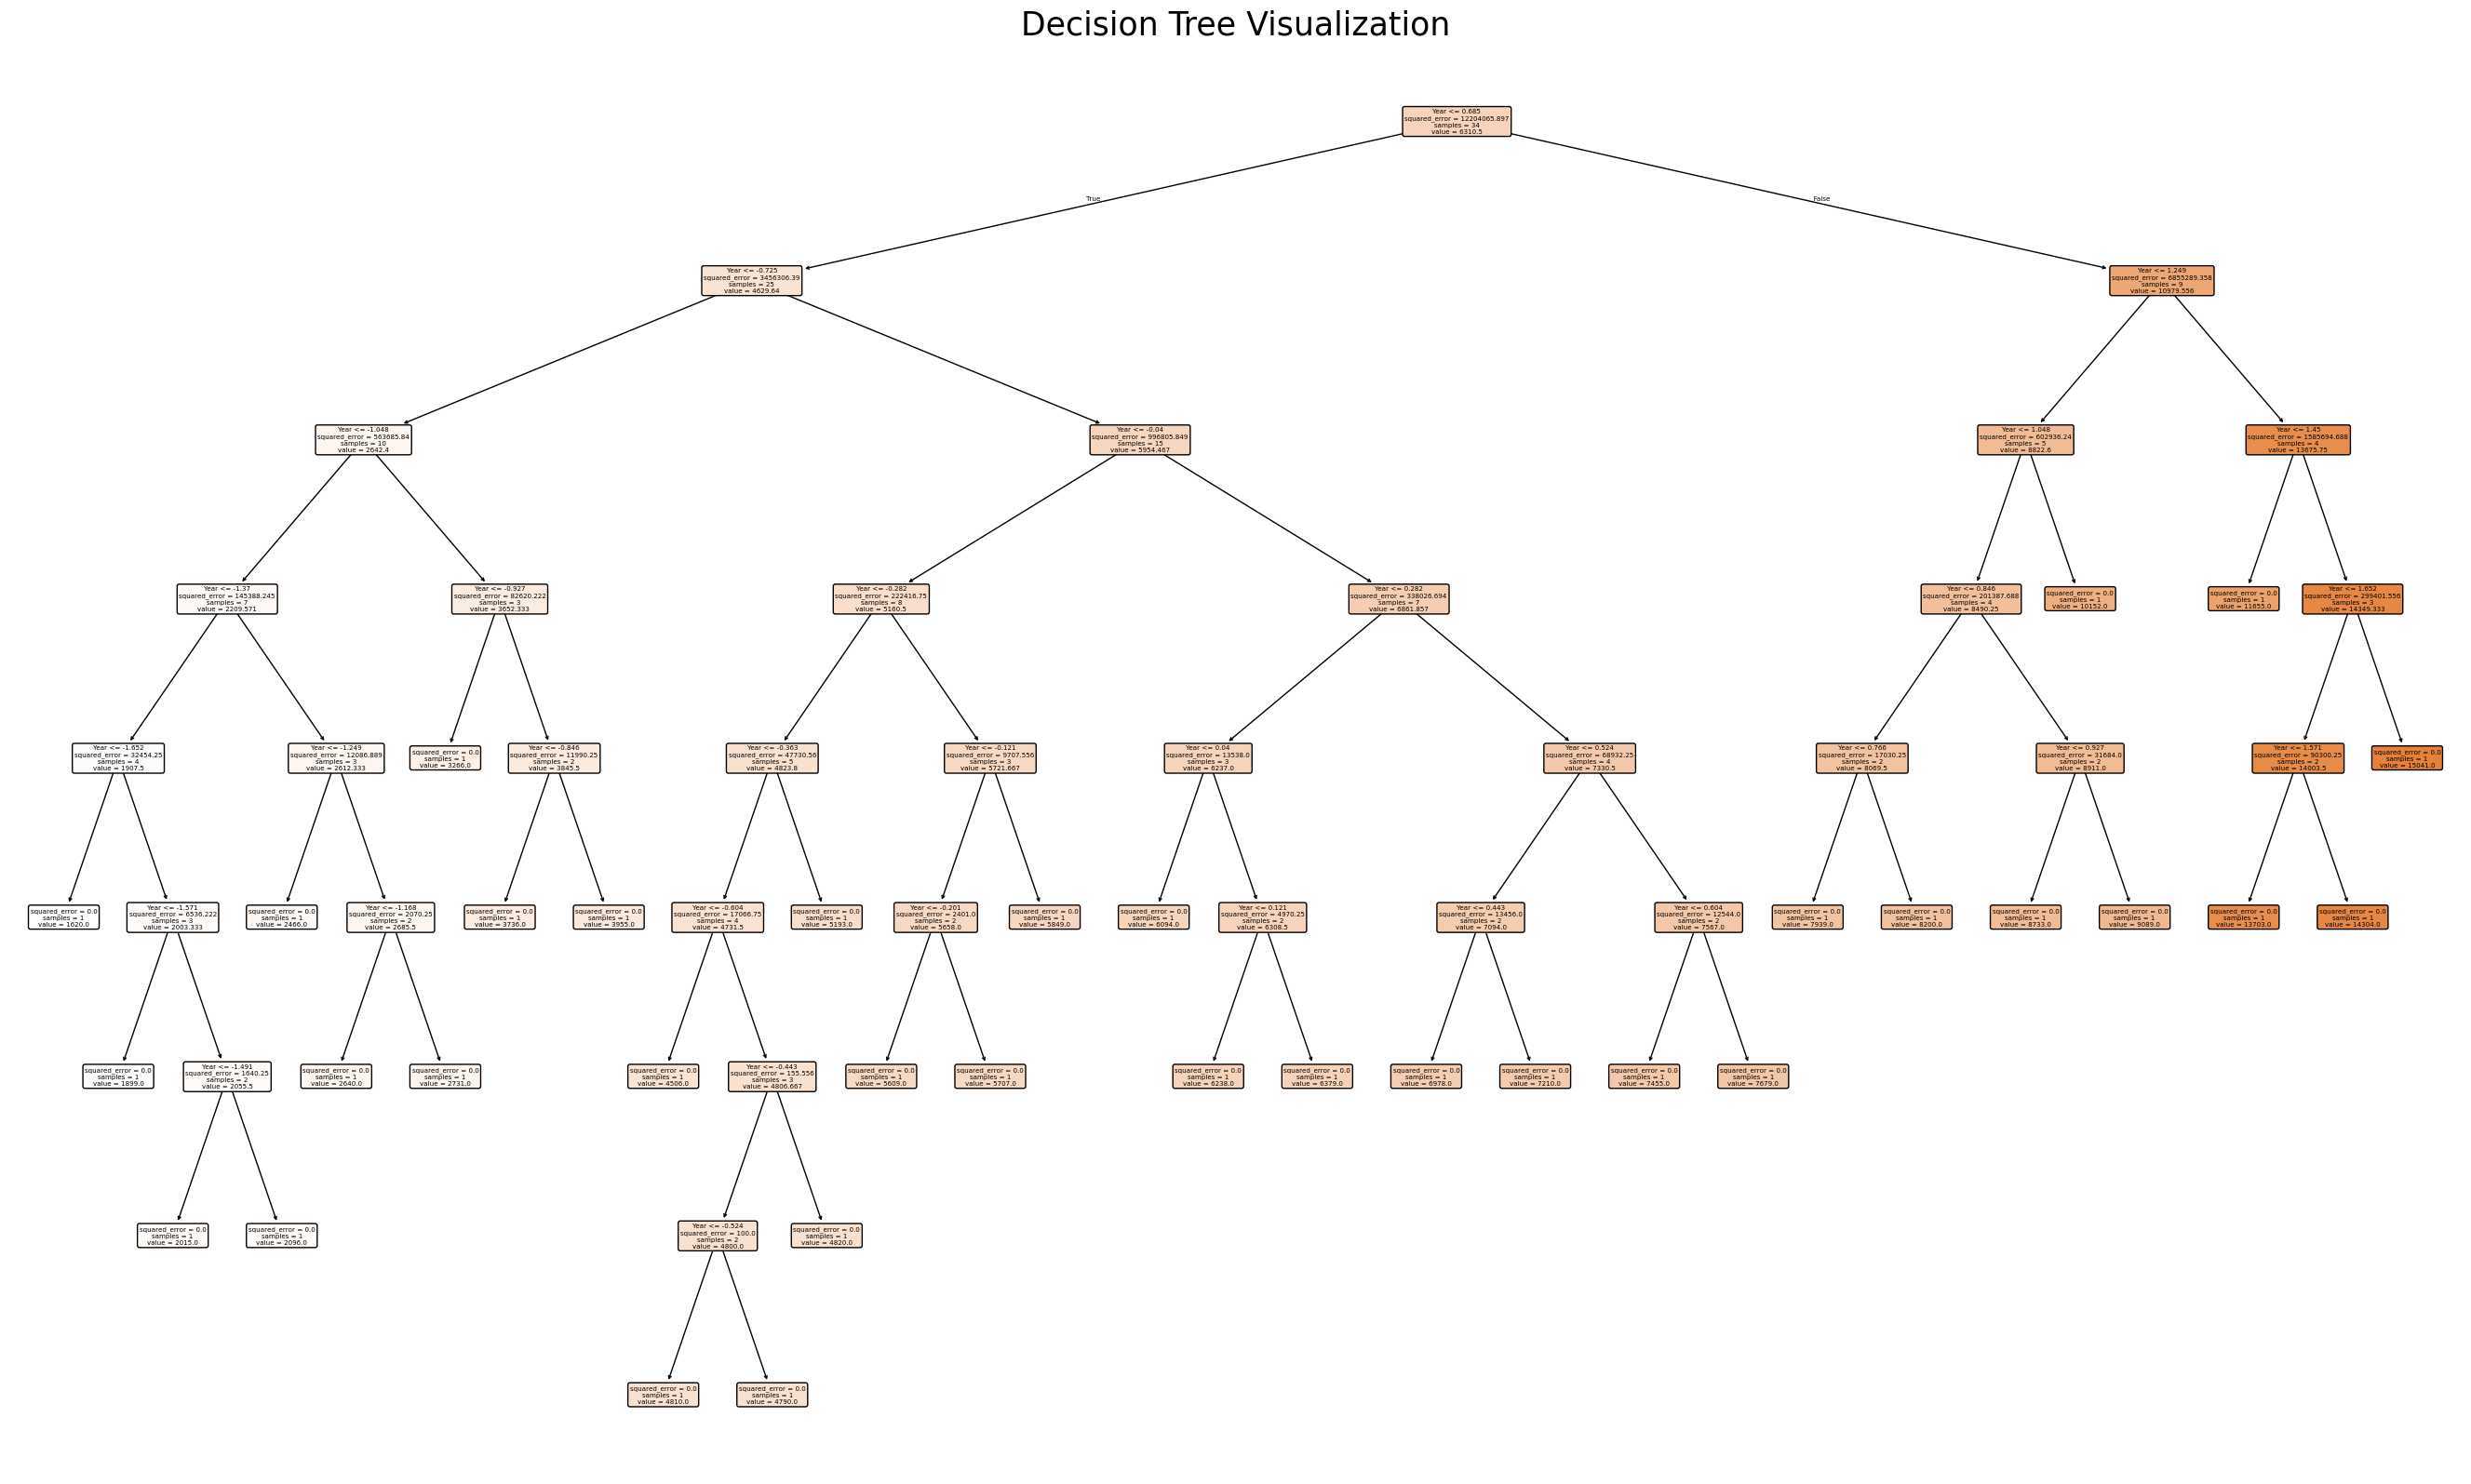

In [33]:
plt.figure(figsize=(34, 20))

feature_names = ['Year', 'Milk Production'] 
plot_tree(dt, filled=True, feature_names=feature_names, rounded=True)

plt.title("Decision Tree Visualization",fontsize=25)
plt.savefig('Decision_Trees.png', dpi=300)
plt.show()

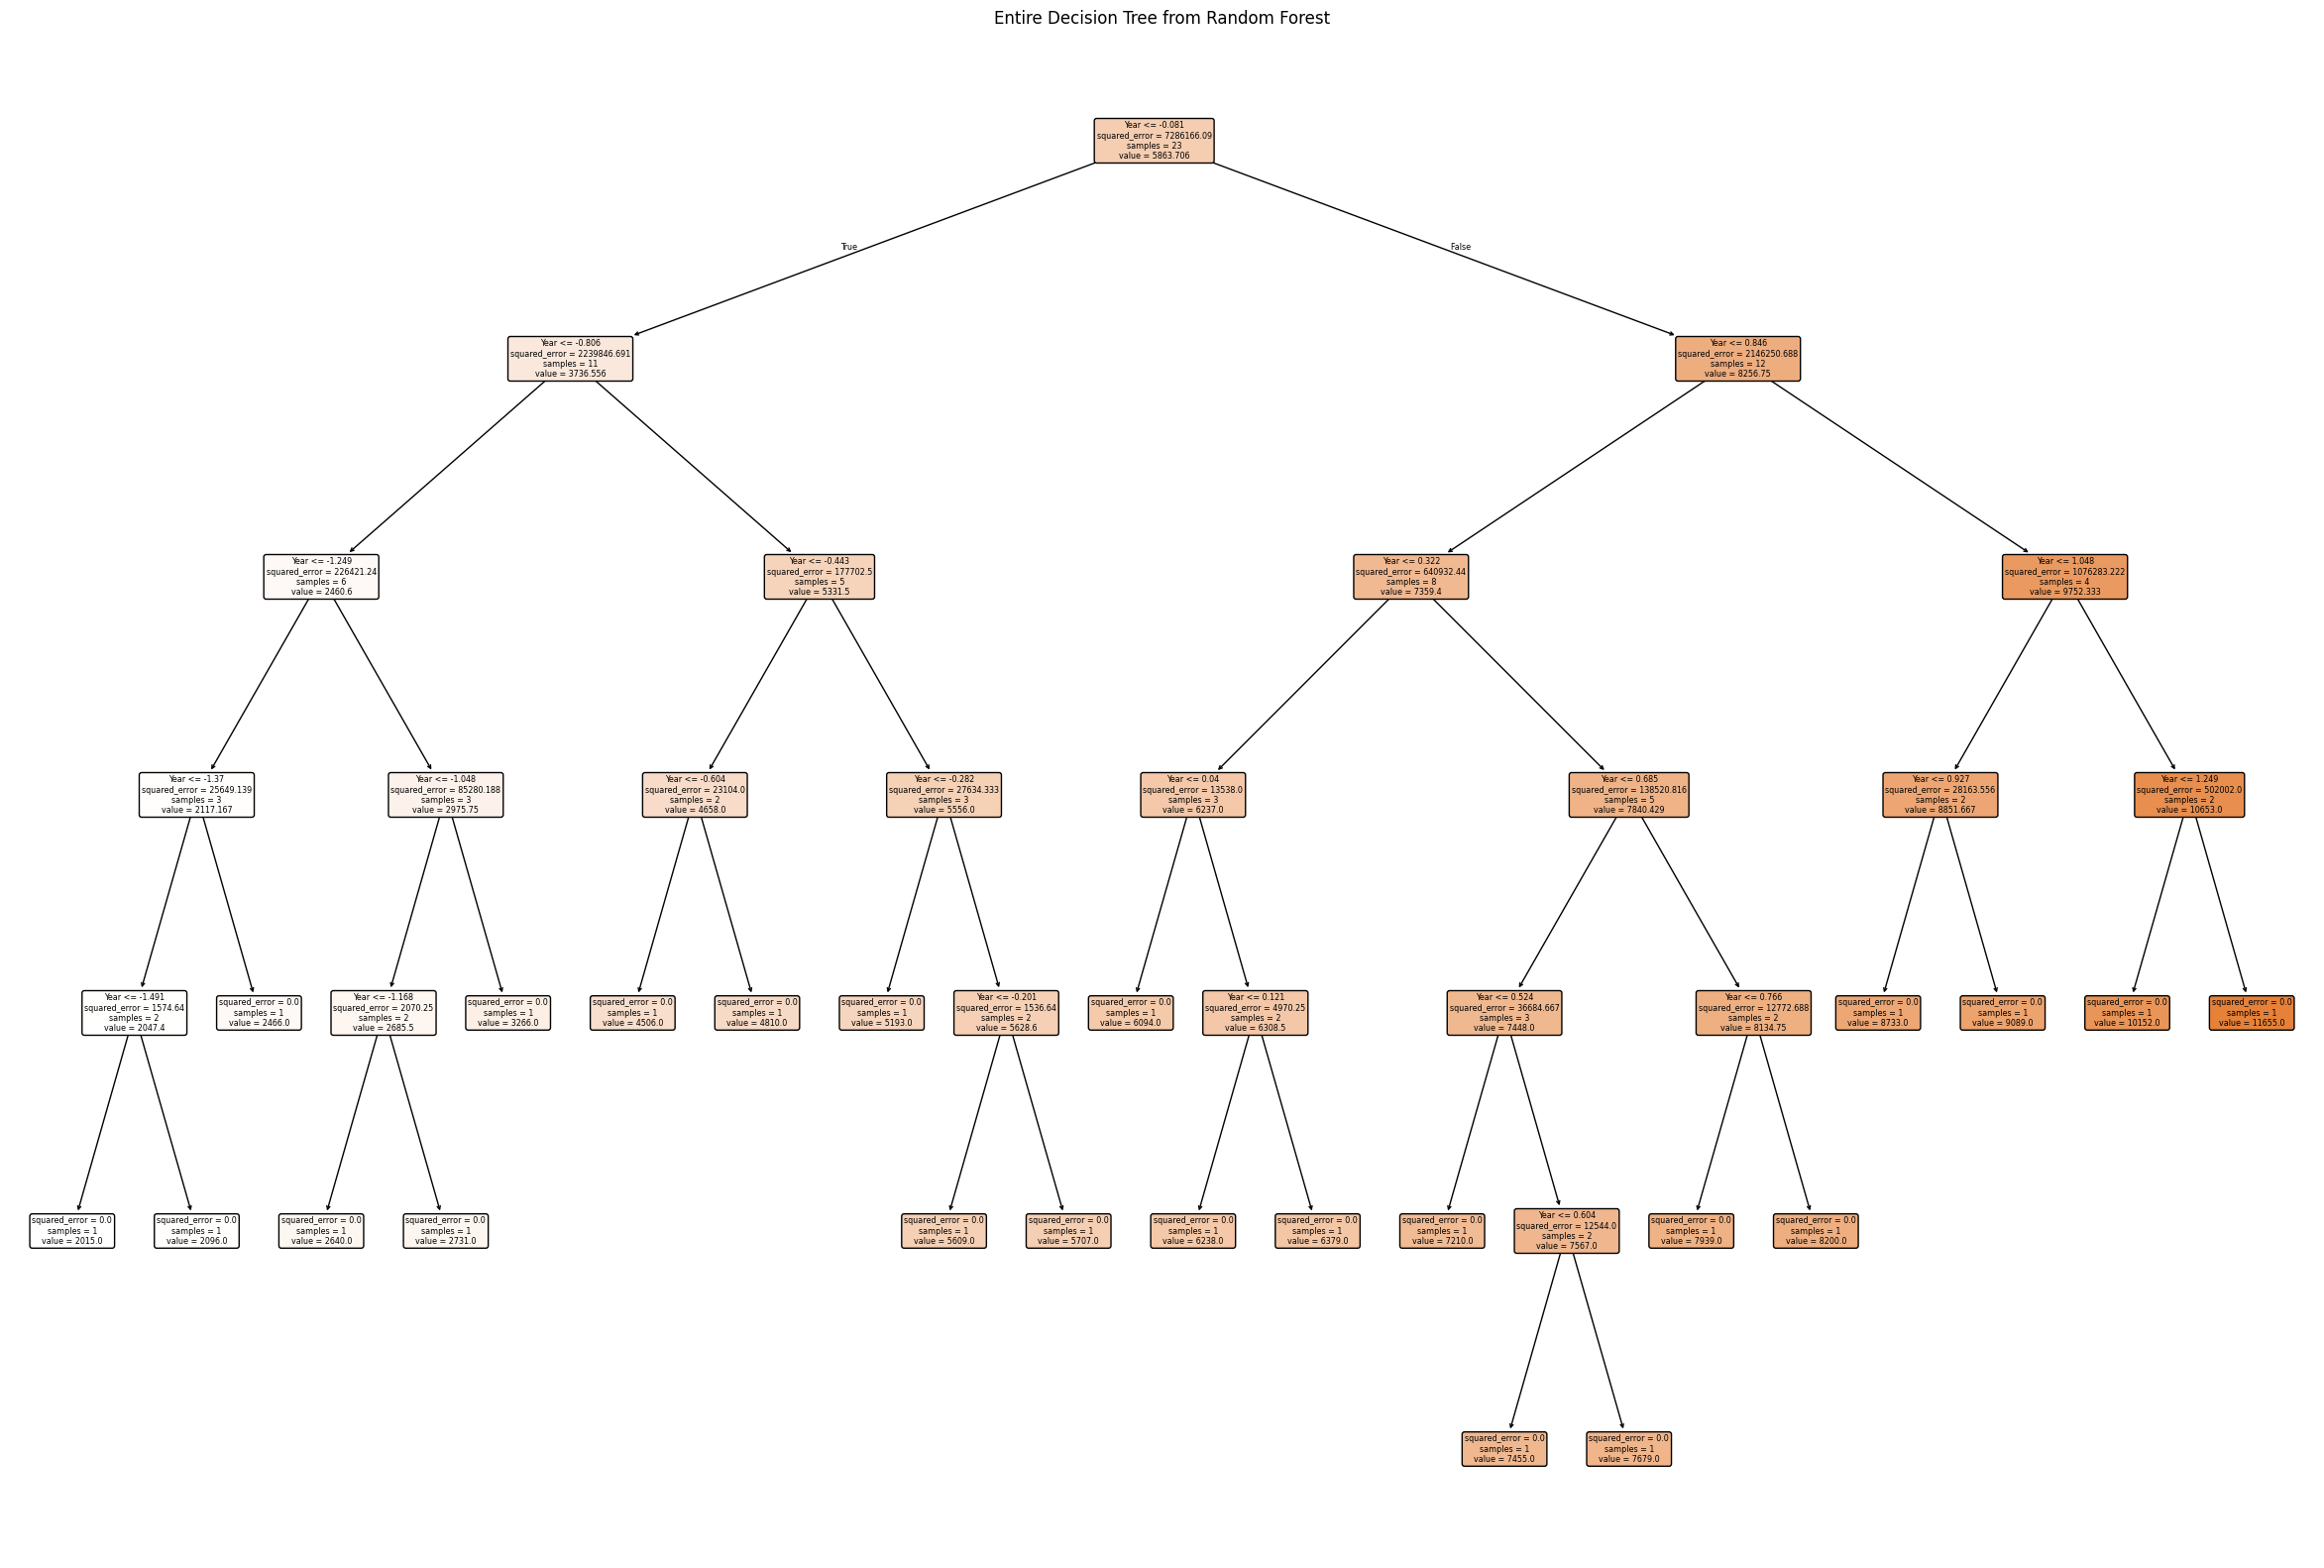

In [22]:
plt.figure(figsize=(30, 20))  # Increase the size for better visibility
# Extract a specific tree, e.g., the first one
plot_tree(rfr.estimators_[99], filled=True, feature_names=['Year', 'Milk Production'], rounded=True)  # Replace with actual feature names
plt.title("Entire Decision Tree from Random Forest")
plt.show()